# Widgets Components

Herein, we present the widgets that can be used as components in order to synthesize higher level widgets, such as the ones presented in _Main Widgets.ipynb_. Those widgets live in `menpo.visualize.widgets.options`. Specifically we split this notebook in the following subsections:

1. __Basics__
2. __Animation Options__
3. __Channels Options__
4. __Landmarks Options__
5. __Renderer Options__
6. __Graph Options__
7. __Text Print__
8. __Feature Options__
9. __Save Figure Options__

In [1]:
from menpo.visualize.widgets.options import ChannelOptionsWidget
from IPython.display import display

channel_options = {'n_channels': 30,
                   'image_is_masked': True,
                   'channels': [0, 10],
                   'glyph_enabled': False,
                   'glyph_block_size': 3,
                   'glyph_use_negative': False,
                   'sum_enabled': True,
                   'masked_enabled': True}

def render_function(name, value):
    print a.selected_values
    
a = ChannelOptionsWidget(channel_options, render_function=render_function, style='info')
display(a)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
tmp = {'n_channels': 10, 
       'image_is_masked': True, 
       'channels': [7, 8, 9], 
       'glyph_enabled': True, 
       'glyph_block_size': 3, 
       'glyph_use_negative': True, 
       'sum_enabled': False, 
       'masked_enabled': False}
a.set_widget_state(tmp, allow_callback=False)

In [3]:
from menpo.visualize.widgets.options import LandmarkOptionsWidget
from IPython.display import display

landmark_options = {'has_landmarks': True,
                    'render_landmarks': True,
                    'group_keys': ['PTS', 'ibug_face_68'],
                    'labels_keys': [['all'], ['jaw', 'eye']],
                    'group': 'ibug_face_68',
                    'with_labels': ['eye']}

def render_function(name, value):
    print a.selected_values
    
a = LandmarkOptionsWidget(landmark_options, render_function=render_function, style='danger')
display(a)

In [11]:
tmp = {'has_landmarks': True,
       'render_landmarks': True,
       'group_keys': ['PTS', 'nontas'],
       'labels_keys': [['all'], ['non', 'tas']],
       'group': 'nontas',
       'with_labels': ['tas']}
a.set_widget_state(tmp, allow_callback=False)

In [12]:
a.selected_values

{'group': 'nontas',
 'group_keys': ['PTS', 'nontas'],
 'has_landmarks': True,
 'labels_keys': [['all'], ['non', 'tas']],
 'render_landmarks': True,
 'with_labels': ['tas']}

In [4]:
from menpo.visualize.widgets.options import TextPrintWidget
from IPython.display import display

n_lines = 3
text_per_line = ['> Nontas', '> London', '> UK']

a = TextPrintWidget(n_lines, text_per_line, style='success')
#a.predefined_style('info')
display(a)

In [5]:
a.set_widget_state(2, ['olympiakos', 'gate 7'])

In [12]:
a.stop_toggle._send??

In [1]:
from menpo.visualize.widgets.options import AnimationOptionsWidget
from IPython.display import display

index = {'min': 0, 'max': 100, 'step': 1, 'index': 10}

def render_function(name, value):
    print a.index_wid._render_function
    
a = AnimationOptionsWidget(index, index_style='buttons', render_function=render_function, style='info')
display(a)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<function render_function at 0x7fc905201b90>
<function render_function at 0x7fc905201b90>
<function render_function at 0x7fc905201b90>
<function render_function at 0x7fc905201b90>
<function render_function at 0x7fc905201b90>
<function render_function at 0x7fc905201b90>
<function render_function at 0x7fc905201b90>
<function render_function at 0x7fc905201b90>
<function render_function at 0x7fc905201b90>
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_function at 0x7fc905201b90>
nontas
<function render_functi

In [2]:
a.index_wid.index_text.width = '2cm'

In [4]:
def update_function(name, value):
    print 'nontas'

a.replace_update_function(update_function)

tmp = {'min': 0, 'max': 20, 'step': 2, 'index': 16}
a.set_widget_state(tmp, allow_callback=False)


<function render_function at 0x7fc905201b90>


In [1]:
from menpo.visualize.widgets.options import GraphOptionsWidget
from IPython.display import display

graph_options = {'legend_entries': ['Nontas', 'Leda'],
                 'x_label': 'X',
                 'y_label': 'Y',
                 'title': 'TITLE',
                 'x_axis_limits': (2, 7),
                 'y_axis_limits': (-0.2, 0.2),
                 'render_lines': [True, True],
                 'line_colour': ['r', 'b'],
                 'line_style': ['--', '-'],
                 'line_width': [1, 3],
                 'render_markers': [True, False],
                 'marker_style': ['o', 's'],
                 'marker_size': [6, 12],
                 'marker_face_colour': ['k', 'm'],
                 'marker_edge_colour': ['w', 'c'],
                 'marker_edge_width': [1, 4],
                 'render_legend': True,
                 'legend_title': '',
                 'legend_font_name': 'sans-serif',
                 'legend_font_style': 'normal',
                 'legend_font_size': 10,
                 'legend_font_weight': 'normal',
                 'legend_marker_scale': 1.,
                 'legend_location': 2,
                 'legend_bbox_to_anchor': (1.05, 1.),
                 'legend_border_axes_pad': 0.,
                 'legend_n_columns': 1,
                 'legend_horizontal_spacing': 0,
                 'legend_vertical_spacing': 0,
                 'legend_border': True,
                 'legend_border_padding': 0,
                 'legend_shadow': False,
                 'legend_rounded_corners': False,
                 'render_axes': True,
                 'axes_font_name': 'sans-serif',
                 'axes_font_size': 10,
                 'axes_font_style': 'normal',
                 'axes_font_weight': 'normal',
                 'figure_size': (10, 8),
                 'render_grid': True,
                 'grid_line_style': '--',
                 'grid_line_width': 1}

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def render_function(name, value):
    print wid.selected_values['line_colour']

wid = GraphOptionsWidget(graph_options, 
                         x_slider_options=(0, 10, 1), 
                         y_slider_options=(-0.5, 0.5, 0.1), 
                         render_function=render_function, style='info', tabs_style='warning', renderer_tabs_style='danger')
display(wid)

['y', 'b']
['g', 'b']
['k', 'b']


In [5]:
wid.renderer_widget.selected_values[0]['grid']

{'grid_line_style': '--', 'grid_line_width': 1, 'render_grid': True}

In [1]:
aa = ['nontas', 'leda']

tmp_lines = []
for k in aa:
    tmp_lines.append(k)
    tmp_lines.append('\n')
tmp_lines = tmp_lines[:-1]
tmp_str = unicode().join(tmp_lines)

print tmp_str

nontas
leda


In [3]:
lines_options = {'render_lines': True,
                 'line_width': 1,
                 'line_colour': ['b'],
                 'line_style': '-'}
markers_options = {'render_markers': True,
                   'marker_size': 20,
                   'marker_face_colour': ['r'],
                   'marker_edge_colour': ['r'],
                   'marker_style': 'o',
                   'marker_edge_width': 1}
rendering_dict_1 = {'lines': lines_options,
                    'markers': markers_options}

lines_options = {'render_lines': False,
                 'line_width': 4,
                 'line_colour': ['y'],
                 'line_style': '--'}
markers_options = {'render_markers': False,
                   'marker_size': 60,
                   'marker_face_colour': ['k'],
                   'marker_edge_colour': ['k'],
                   'marker_style': 'd',
                   'marker_edge_width': 4}
rendering_dict_2 = {'lines': lines_options,
                    'markers': markers_options}

rendering_options = [rendering_dict_1, rendering_dict_2]

In [8]:
options_tabs = ['lines', 'markers']
objects_names = None
labels_per_object = None
selected_object = 1
object_selection_dropdown_visible = True

def render_function(name, value):
    #print 'nontas'#a.selected_values
    print a.selected_values[0]['markers']['marker_face_colour']
    print a.selected_values[1]['markers']['marker_face_colour']

In [9]:
from menpo.visualize.widgets.options import RendererOptionsWidget
from IPython.display import display

a = RendererOptionsWidget(rendering_options, options_tabs=options_tabs, objects_names=objects_names, 
                          labels_per_object=labels_per_object, selected_object=selected_object, 
                          object_selection_dropdown_visible=object_selection_dropdown_visible, 
                          render_function=render_function, style='danger')
display(a)

In [1]:
lines_options = {'render_lines': True,
                 'line_width': 1,
                 'line_colour': ['b', 'r'],
                 'line_style': '-'}
markers_options = {'render_markers': True,
                   'marker_size': 20,
                   'marker_face_colour': ['w', 'w'],
                   'marker_edge_colour': ['b', 'r'],
                   'marker_style': 'o',
                   'marker_edge_width': 1}
numbering_options = {'render_numbering': True,
                     'numbers_font_name': 'serif',
                     'numbers_font_size': 10,
                     'numbers_font_style': 'normal',
                     'numbers_font_weight': 'normal',
                     'numbers_font_colour': ['k'],
                     'numbers_horizontal_align': 'center',
                     'numbers_vertical_align': 'bottom'}
legend_options = {'render_legend': True,
                  'legend_title': '',
                  'legend_font_name': 'serif',
                  'legend_font_style': 'normal',
                  'legend_font_size': 10,
                  'legend_font_weight': 'normal',
                  'legend_marker_scale': 1.,
                  'legend_location': 2,
                  'legend_bbox_to_anchor': (1.05, 1.),
                  'legend_border_axes_pad': 1.,
                  'legend_n_columns': 1,
                  'legend_horizontal_spacing': 1.,
                  'legend_vertical_spacing': 1.,
                  'legend_border': True,
                  'legend_border_padding': 0.5,
                  'legend_shadow': False,
                  'legend_rounded_corners': True}
figure_options = {'x_scale': 1.,
                  'y_scale': 1.,
                  'render_axes': True,
                  'axes_font_name': 'serif',
                  'axes_font_size': 10,
                  'axes_font_style': 'normal',
                  'axes_font_weight': 'normal',
                  'axes_x_limits': None,
                  'axes_y_limits': None}
grid_options = {'render_grid': True,
                'grid_line_style': '--',
                'grid_line_width': 0.5}
image_options = {'alpha': 1.,
                 'interpolation': 'bilinear',
                 'cmap_name': 'gray'}
rendering_dict_1 = {'lines': lines_options,
                    'markers': markers_options,
                    'numbering': numbering_options,
                    'legend': legend_options,
                    'figure': figure_options,
                    'grid': grid_options,
                   'image': image_options}


lines_options = {'render_lines': True,
                 'line_width': 100,
                 'line_colour': [[0.1, 0.2, 0.3]],
                 'line_style': '-'}
markers_options = {'render_markers': True,
                   'marker_size': 200,
                   'marker_face_colour': [[0.1, 0.2, 0.3]],
                   'marker_edge_colour': ['m'],
                   'marker_style': 'x',
                   'marker_edge_width': 1}
numbering_options = {'render_numbering': False,
                     'numbers_font_name': 'serif',
                     'numbers_font_size': 10,
                     'numbers_font_style': 'normal',
                     'numbers_font_weight': 'normal',
                     'numbers_font_colour': ['k'],
                     'numbers_horizontal_align': 'center',
                     'numbers_vertical_align': 'bottom'}
legend_options = {'render_legend': False,
                  'legend_title': '',
                  'legend_font_name': 'serif',
                  'legend_font_style': 'normal',
                  'legend_font_size': 10,
                  'legend_font_weight': 'normal',
                  'legend_marker_scale': 1.,
                  'legend_location': 2,
                  'legend_bbox_to_anchor': (1.05, 1.),
                  'legend_border_axes_pad': 1.,
                  'legend_n_columns': 1,
                  'legend_horizontal_spacing': 1.,
                  'legend_vertical_spacing': 1.,
                  'legend_border': True,
                  'legend_border_padding': 0.5,
                  'legend_shadow': False,
                  'legend_rounded_corners': True}
figure_options = {'x_scale': 1.,
                  'y_scale': 1.,
                  'render_axes': False,
                  'axes_font_name': 'serif',
                  'axes_font_size': 10,
                  'axes_font_style': 'normal',
                  'axes_font_weight': 'normal',
                  'axes_x_limits': None,
                  'axes_y_limits': None}
grid_options = {'render_grid': False,
                'grid_line_style': '--',
                'grid_line_width': 0.5}
image_options = {'alpha': 1.,
                 'interpolation': 'bilinear',
                 'cmap_name': 'gray'}
rendering_dict_2 = {'lines': lines_options,
                    'markers': markers_options,
                    'numbering': numbering_options,
                    'legend': legend_options,
                    'figure': figure_options,
                    'grid': grid_options,
                   'image': image_options}

rendering_options = [rendering_dict_1, rendering_dict_2]

In [2]:
options_tabs = ['lines', 'markers', 'numbering', 'figure_one', 'figure_two', 'legend', 'grid', 'image']
objects_names = ['Nontas', 'Leda']
labels_per_object = [['jaw', 'eyes'], None]
selected_object = 1
object_selection_dropdown_visible = True

def render_function(name, value):
    #print 'nontas'#a.selected_values
    print a.selected_values[0]['markers']['marker_face_colour']
    print a.selected_values[1]['markers']['marker_face_colour']

In [3]:
from menpo.visualize.widgets.options import RendererOptionsWidget
from IPython.display import display

a = RendererOptionsWidget(rendering_options, options_tabs=options_tabs, objects_names=objects_names, 
                          labels_per_object=labels_per_object, selected_object=selected_object, 
                          object_selection_dropdown_visible=object_selection_dropdown_visible, 
                          render_function=render_function, style='danger')
display(a)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [7]:
a.predefined_style('minimal', 'info')

In [6]:
lines_options = {'render_lines': False,
                 'line_width': 1,
                 'line_colour': ['r'],
                 'line_style': '-'}
markers_options = {'render_markers': False,
                   'marker_size': 20,
                   'marker_face_colour': ['k'],
                   'marker_edge_colour': ['c'],
                   'marker_style': 'o',
                   'marker_edge_width': 1}
numbering_options = {'render_numbering': True,
                     'numbers_font_name': 'serif',
                     'numbers_font_size': 10,
                     'numbers_font_style': 'normal',
                     'numbers_font_weight': 'normal',
                     'numbers_font_colour': ['k'],
                     'numbers_horizontal_align': 'center',
                     'numbers_vertical_align': 'bottom'}
legend_options = {'render_legend': True,
                  'legend_title': '',
                  'legend_font_name': 'serif',
                  'legend_font_style': 'normal',
                  'legend_font_size': 10,
                  'legend_font_weight': 'normal',
                  'legend_marker_scale': 1.,
                  'legend_location': 2,
                  'legend_bbox_to_anchor': (1.05, 1.),
                  'legend_border_axes_pad': 1.,
                  'legend_n_columns': 1,
                  'legend_horizontal_spacing': 1.,
                  'legend_vertical_spacing': 1.,
                  'legend_border': True,
                  'legend_border_padding': 0.5,
                  'legend_shadow': False,
                  'legend_rounded_corners': True}
figure_options = {'x_scale': 1.,
                  'y_scale': 1.,
                  'render_axes': True,
                  'axes_font_name': 'serif',
                  'axes_font_size': 10,
                  'axes_font_style': 'normal',
                  'axes_font_weight': 'normal',
                  'axes_x_limits': None,
                  'axes_y_limits': None}
grid_options = {'render_grid': True,
                'grid_line_style': '--',
                'grid_line_width': 0.5}
image_options = {'alpha': 0.5,
                 'interpolation': 'bilinear',
                 'cmap_name': 'gray'}
rendering_dict_1 = {'lines': lines_options,
                    'markers': markers_options,
                    'numbering': numbering_options,
                    'legend': legend_options,
                    'figure': figure_options,
                    'grid': grid_options,
                    'image': image_options}


lines_options = {'render_lines': True,
                 'line_width': 100,
                 'line_colour': [[0.1, 0.2, 0.3], 'b'],
                 'line_style': '-'}
markers_options = {'render_markers': True,
                   'marker_size': 200,
                   'marker_face_colour': [[0.123, 0.234, 0.345], 'r'],
                   'marker_edge_colour': ['m', 'm'],
                   'marker_style': 'x',
                   'marker_edge_width': 1}
numbering_options = {'render_numbering': True,
                     'numbers_font_name': 'serif',
                     'numbers_font_size': 10,
                     'numbers_font_style': 'normal',
                     'numbers_font_weight': 'normal',
                     'numbers_font_colour': ['k'],
                     'numbers_horizontal_align': 'center',
                     'numbers_vertical_align': 'bottom'}
legend_options = {'render_legend': True,
                  'legend_title': '',
                  'legend_font_name': 'serif',
                  'legend_font_style': 'normal',
                  'legend_font_size': 10,
                  'legend_font_weight': 'normal',
                  'legend_marker_scale': 1.,
                  'legend_location': 2,
                  'legend_bbox_to_anchor': (1.05, 1.),
                  'legend_border_axes_pad': 1.,
                  'legend_n_columns': 1,
                  'legend_horizontal_spacing': 1.,
                  'legend_vertical_spacing': 1.,
                  'legend_border': True,
                  'legend_border_padding': 0.5,
                  'legend_shadow': False,
                  'legend_rounded_corners': True}
figure_options = {'x_scale': 1.,
                  'y_scale': 1.,
                  'render_axes': True,
                  'axes_font_name': 'serif',
                  'axes_font_size': 10,
                  'axes_font_style': 'normal',
                  'axes_font_weight': 'normal',
                  'axes_x_limits': None,
                  'axes_y_limits': None}
grid_options = {'render_grid': True,
                'grid_line_style': '--',
                'grid_line_width': 0.5}
image_options = {'alpha': 0.0,
                 'interpolation': 'bilinear',
                 'cmap_name': 'gray'}
rendering_dict_2 = {'lines': lines_options,
                    'markers': markers_options,
                    'numbering': numbering_options,
                    'legend': legend_options,
                    'figure': figure_options,
                    'grid': grid_options,
                    'image': image_options}

tmp = [rendering_dict_1, rendering_dict_2]
labels_per_object = [['1'], ['jaw', 'eyes']]

In [7]:
def render_function(name, value):
    print 'nontas'

a.replace_render_function(render_function)
a.set_widget_state(tmp, labels_per_object, allow_callback=True)

nontas


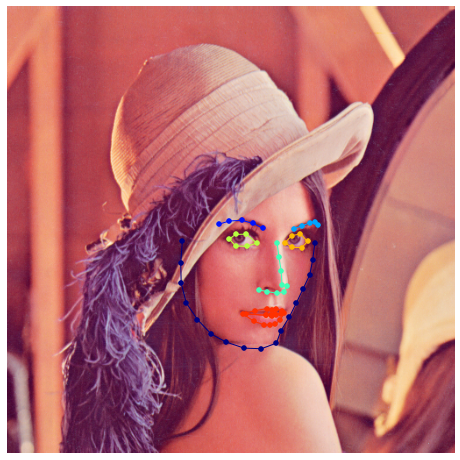

In [2]:
%matplotlib inline
import menpo.io as mio

im = mio.import_builtin_asset.lenna_png()
renderer = im.view_landmarks()

In [7]:
from menpo.visualize.widgets.options import SaveFigureOptionsWidget
from IPython.display import display

a = SaveFigureOptionsWidget(renderer, style='minimal')
display(a)

In [1]:
from menpo.visualize.widgets.options import FeatureOptionsWidget
from IPython.display import display

a = FeatureOptionsWidget()
a.style(border_visible=False)
display(a)

:0: FutureWarning: IPython widgets are experimental and may change in the future.
